# Bollinger band mean reversion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [4]:
df = df[-1_000_000:]

In [5]:
def bbands(price, window=None, width=None, numsd=None):
    """ returns average, upper band, and lower band"""
    ave = price.rolling(window).mean()
    sd = price.rolling(window).std(ddof=0)
    if width:
        upband = ave * (1+width)
        dnband = ave * (1-width)
        return price, np.round(ave,3), np.round(upband,3), np.round(dnband,3)        
    if numsd:
        upband = ave + (sd*numsd)
        dnband = ave - (sd*numsd)
        return price, np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [6]:
window=500
df0 = pd.DataFrame()
df0['price'],df0['ave'],df0['upper'],df0['lower']=bbands(df.close, window=window, numsd=1)
df0.dropna(inplace=True)
df0

,price,ave,upper,lower
time,,,,
2021-04-23 07:22:59.952,49263.57,49116.076,49296.702,48935.449
2021-04-23 07:23:04.791,49291.35,49117.058,49297.298,48936.818
2021-04-23 07:23:11.737,49291.28,49118.041,49297.889,48938.193
2021-04-23 07:23:14.952,49291.35,49119.024,49298.473,48939.574
2021-04-23 07:23:21.469,49266.84,49119.967,49298.950,48940.983
...,...,...,...,...
2021-06-19 16:27:04.502,35841.54,35991.152,36085.592,35896.712
2021-06-19 16:27:20.667,35823.32,35990.712,36085.420,35896.003
2021-06-19 16:27:26.627,35826.83,35990.305,36085.280,35895.331


In [10]:
def get_up_cross(df, col):
    # col is price column
    crit1 = df[col].shift(1) < df.upper.shift(1)  
    crit2 = df[col] > df.upper
    return df[col][(crit1) & (crit2)]

def get_down_cross(df, col):
    # col is price column    
    crit1 = df[col].shift(1) > df.lower.shift(1) 
    crit2 = df[col] < df.lower
    return df[col][(crit1) & (crit2)]

bb_up = get_down_cross(df0, 'price') #Reversing up and down 
bb_down = get_up_cross(df0, 'price') 

In [11]:
bb_side_up = pd.Series(-1, index=bb_up.index) # sell on up cross for mean reversion
bb_side_down = pd.Series(1, index=bb_down.index) # buy on down cross for mean reversion
side = pd.concat([bb_side_up,bb_side_down]).sort_index()
side

time
2021-04-23 07:29:32.493   -1
2021-04-23 07:29:45.565   -1
2021-04-23 07:30:03.036   -1
2021-04-23 07:30:09.761   -1
2021-04-23 07:36:17.419   -1
                          ..
2021-06-19 15:50:12.974   -1
2021-06-19 16:07:43.036   -1
2021-06-19 16:10:03.488   -1
2021-06-19 16:13:31.676   -1
2021-06-19 16:18:09.877   -1
Length: 23248, dtype: int64

In [ ]:
df0.to_csv("../data/progress2.csv")
side.to_csv("../data/side.csv")

## Plotting

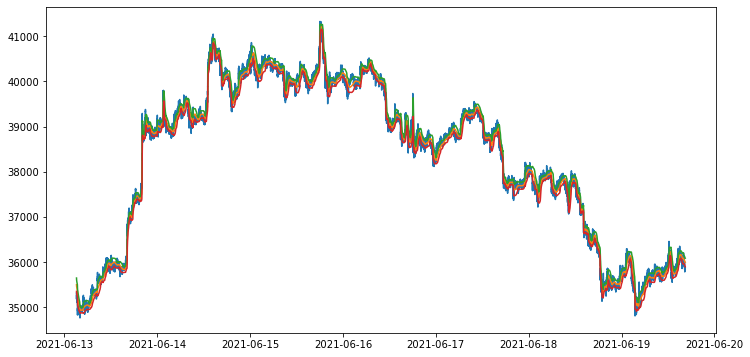

In [13]:
plot = df0[-100000:]
f,ax=plt.subplots(figsize=(12,6))
# df0.plot(ax=ax)
ax.plot(plot);

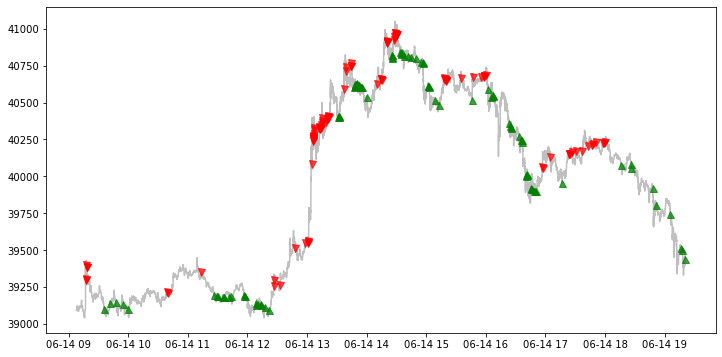

In [20]:
plot = df0
plot["up"] = bb_up
plot["down"] = bb_down
plot = plot[-80000:-70000]

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(plot.price, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')


